# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Importing the training set

In [90]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [91]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [92]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [93]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [95]:
regressor = Sequential()
regressor2 = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [96]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [97]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [98]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [99]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

### Adding the output layer

In [100]:
regressor.add(Dense(units = 1))

regressor2.add(Dense(units = 1))

### Compiling the RNN

In [101]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 176ms/step - loss: 0.0285
Epoch 2/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0076
Epoch 3/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0045
Epoch 13/100

In [ ]:
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [81]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [82]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [83]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price2 = regressor2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

1/1 [==============================] - 2s 2s/step


### Visualising the results

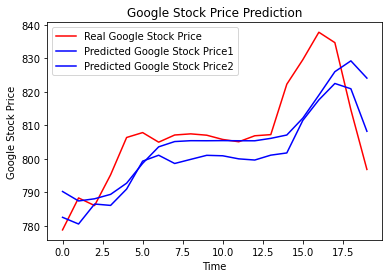

In [84]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price1')
plt.plot(predicted_stock_price2, color = 'green', label = 'Predicted Google Stock Price2')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [85]:
predicted_stock_price = np.delete(predicted_stock_price, 0)
predicted_stock_price2 = np.delete(predicted_stock_price2, 0)

In [86]:
predicted_stock_price.reshape(len(predicted_stock_price), 1)
predicted_stock_price2.reshape(len(predicted_stock_price2), 1)

array([[787.4527 ],
       [788.1037 ],
       [789.4208 ],
       [792.759  ],
       [798.6726 ],
       [803.602  ],
       [805.1811 ],
       [805.4416 ],
       [805.4252 ],
       [805.46277],
       [805.41974],
       [805.4133 ],
       [806.1373 ],
       [807.1372 ],
       [812.17456],
       [819.0218 ],
       [826.03674],
       [829.2688 ],
       [824.1222 ]], dtype=float32)

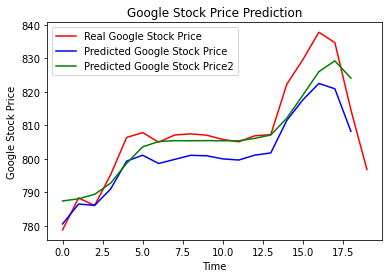

In [87]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(predicted_stock_price2, color = 'green', label = 'Predicted Google Stock Price2')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()